# Milestone 2 - Exploratory Analysis

This notebook regroups the different plots of the exploratory analysis of our dataset. 

In [1]:
import pandas as pd
import requests
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

## Colonisation

### Most colonizing countries

We will first observe which countries were the biggest colonisers over the past centuries. The first common observation is that all of them are european countries.

In [2]:
colonies_df = pd.read_csv('datasets/colonies.csv')

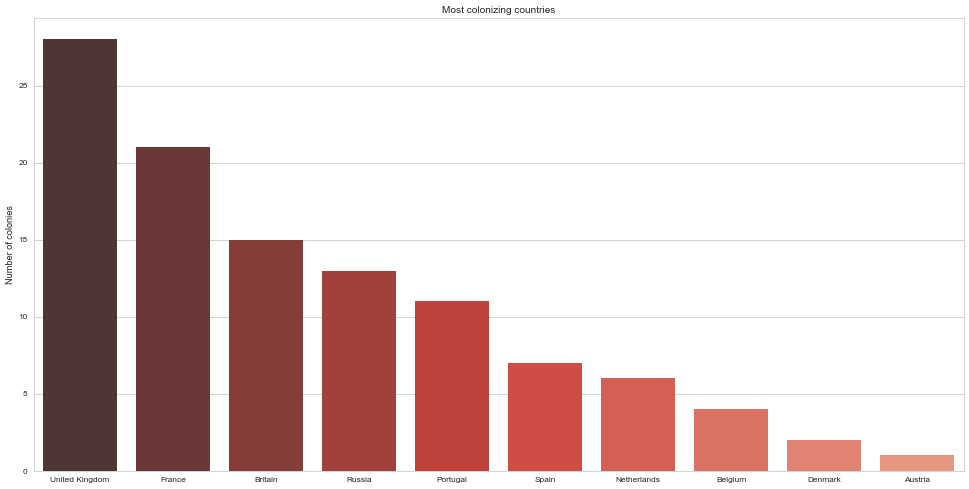

In [3]:
x = np.linspace(0,9,10)
my_xticks = colonies_df['Colonizer Country'].value_counts().index
y = colonies_df['Colonizer Country'].value_counts().values


plt.figure(figsize=(20,10), dpi=60, facecolor='w', edgecolor='k')
sns.set(style="whitegrid")
sns.barplot(x,y,palette="Reds_d")
plt.xticks(x, my_xticks)
plt.ylabel('Number of colonies')
plt.title('Most colonizing countries')
plt.show()

### Map of Colonisation

Considering the results found above on the most colonising countries, we take the 8 first colonizers and plot them below. (United Kingdom, France, Russia, Portugal, Spain, Netherlands, Belgium and Denmark)

In [4]:
import os
colonisation_map = folium.Map(
    location=[30,0],
    tiles='Stamen Toner',
    zoom_start=2
)

world_edge = os.path.join('datasets', 'world.json')

folium.GeoJson(
    world_edge,
    name='geojson'
).add_to(colonisation_map)

colonisation_map

In [5]:
def colonisers_colors(country_id):
    """Maps each colonizing country with a different color"""
    print 'id = ', country_id
    if colonies_df['ID'].str.contains(country_id).sum()>0:
        country = colonies_df.loc[colonies_df['ID'] == country_id, 'Colonizer Country'].values[0]
    else:
        country = 'NaN'
        
    print 'country = ', country
    if country == 'France':
        return '#ffff66'
    if (country == 'United Kingdom') or (country == 'Britain'):
        return '#ff0000'
    if country == 'Russia':
        return '#00ccff'
    if country == 'Portugal':
        return '#66ff66'
    if country == 'Spain':
        return '#ff9900'
    if country == 'Netherlands':
        return '#ff33cc'
    if country == 'Belgium':
        return '#339966'
    if country == 'Denmark':
        return '#3399ff'
    if country == 'None':
        return '#808080'
    else:
        return '#808080'

In [6]:
world_edge = os.path.join('datasets', 'geo.json')
colony_map = folium.Map([30,0], tiles='cartodbpositron', zoom_start=2)
folium.GeoJson(
    world_edge,
    name='geojson'
).add_to(colony_map)

ValueError: No JSON object could be decoded

In [7]:
folium.GeoJson(
    world_edge,
    style_function=lambda feature: {
        'fillColor': colonisers_colors(features['properties']['ISO_A2']),
        'color' : 'black',
        'weight' : 2,
        'dashArray' : '5, 5'
        }
    ).add_to(colony_map)

colony_map

ValueError: No JSON object could be decoded

## Decolonisation over time and continent

> Can't continue this part because of lack of dataset cleaning

By looking at the deconolisation dates, we can observe when European Colonisers has lost their grasps on their colonies. (Happening by vague in continents? Communicating between continents? Map of the decolonisation date would be good to look at limitrophs countries)

In [48]:
decolonisation_df = pd.read_csv('datasets/colonies_wikipedia.csv')
decolonisation_df = decolonisation_df[decolonisation_df['Date'] != 'False']
decolonisation_df.head()

Unnamed: 0 Colonized Country  ID       Date Colonizer Country  \
0           1         Greenland  GL        NaN           Denmark   
1           2           Iceland  IS        NaN           Denmark   
2           3            Canada  CA  1/07/1867    United Kingdom   
3           4     United States  US  4/07/1776            France   
4           5             Haiti  HT  1/01/1804            France   

                   URL  
0      /wiki/Greenland  
1        /wiki/Iceland  
2         /wiki/Canada  
3  /wiki/United_States  
4          /wiki/Haiti

In [50]:
decolonisation_df = decolonisation_df[decolonisation_df['Date'] != 'NaN']
new_df = decolonisation_df[decolonisation_df['ID'] != 'PK']

In [56]:
new_df = new_df.drop(100)

ValueError: labels [100] not contained in axis

In [63]:
x = np.linspace(1776,2017,106)
my_xticks = decolonisation_df['Date'].value_counts().index
y = decolonisation_df['Date'].value_counts().values

plt.figure(figsize=(20,10), dpi=60, facecolor='w', edgecolor='k')
sns.barplot(x,y,palette="Reds_d")
plt.xticks(x, my_xticks)
plt.ylabel('Number of colonies')
plt.title('Most colonizing countries')
plt.show()

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 2: ordinal not in range(128)

In [65]:
y = decolonisation_df['Date'].value_counts()
y.head(21)

31/08/1991    2
15/09/1821    2
1/07/1962     2
14/08/1947    1
6/09/1968     1
4/01/1948     1
2/10/1958     1
3/10/1932     1
27/06/1890    1
11/11/1975    1
1/12/1821     1
9/07/2011     1
4/04/1960     1
20/03/1956    1
1/07/1960     1
21/09/1981    1
1/08/1960     1
7/09/1822     1
12/12/1963    1
15/08/1947    1
25/03/1918    1
Name: Date, dtype: int64

In [66]:
# Plot of Decolonization over time and per region (NEED TO ADD REGION TO DATASET)

myticks = ['Europe','Middle East','Asia','Africa','Americas']
df2 = decolonisation_df.groupby(['Date', 'region'])['Date'].count().unstack('Date').fillna(0)

plt.figure(figsize=(20,10), dpi=60, facecolor='w', edgecolor='k')
df2.plot(kind='bar', stacked=True, figsize = (20,10), fontsize = 13, width = 1)
#plt.xticks(np.linspace(1,5,5)-1, myticks)
plt.legend(['Europe','Middle East','Asia','Africa','Americas'],fontsize = 11)
plt.title('Number of conflicts per year and per continent', fontsize = 14)
plt.ylabel('Number of conflicts')
plt.show()

KeyError: 'region'

In [67]:
# Choropleth map of decolonization over time

## History of conflicts in Modern History

### Presence of conflicts on continents

In this part, all conflicts are taken into account, given that they present more than 25 casualties.
Maybe separating this table also between minor and major conflicts would be relevant.

In [68]:
ucdp_df = pd.read_csv('datasets/clean_conflict.csv')
ucdp_df.head()

Unnamed: 0  conflictid  location    sidea                          side b  \
0           0         200   Bolivia  Bolivia  Popular Revolutionary Movement   
1           1         200   Bolivia  Bolivia                             MNR   
2           2         200   Bolivia  Bolivia                             ELN   
3           3         201  Cambodia   France                   Khmer Issarak   
4           4         201  Cambodia   France                   Khmer Issarak   

  sidebid  incomp      terr  year  intensity  cumint  type  start_month  \
0     719       2   Bolivia  1946          2       1     3            7   
1     720       2   Bolivia  1952          1       1     3            7   
2     721       2   Bolivia  1967          1       1     3            7   
3     160       1  Cambodia  1946          1       0     1            8   
4     160       1  Cambodia  1947          1       0     1            8   

    end_month region ISO2  
0  1946-07-21      5   BO  
1  1952-04-12      5   BO  
2  1967-10-16      5   BO  
3         NaN      3   KH  
4         NaN      3   KH

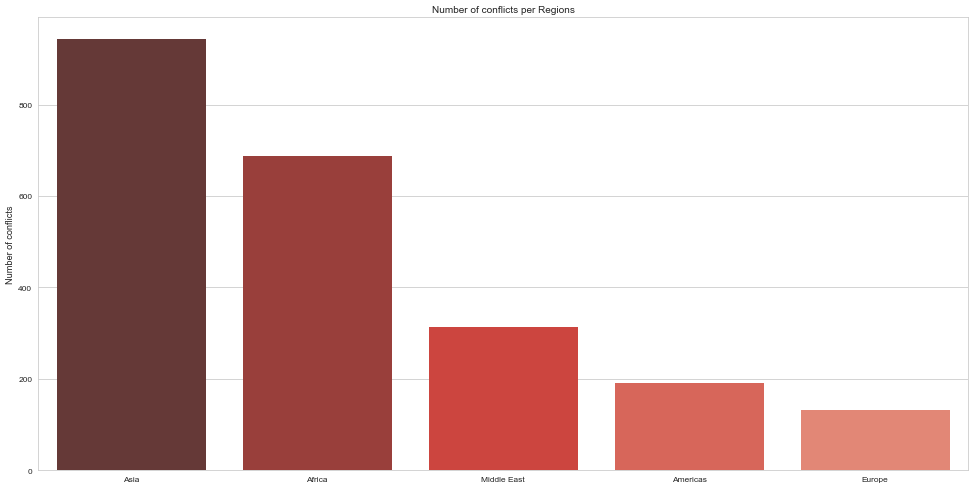

In [76]:
x = np.linspace(1,5,5)
y_ = ucdp_df['region'].value_counts().values
y = y_[:5]
myticks = ['Asia','Africa','Middle East','Americas','Europe']

plt.figure(figsize=(20,10), dpi=60, facecolor='w', edgecolor='k')
sns.set(style="whitegrid")
sns.barplot(x,y,palette="Reds_d")
plt.ylabel('Number of conflicts')
plt.title('Number of conflicts per Regions')
plt.xticks(x-1,myticks)
plt.show()

### What are they fighting for?


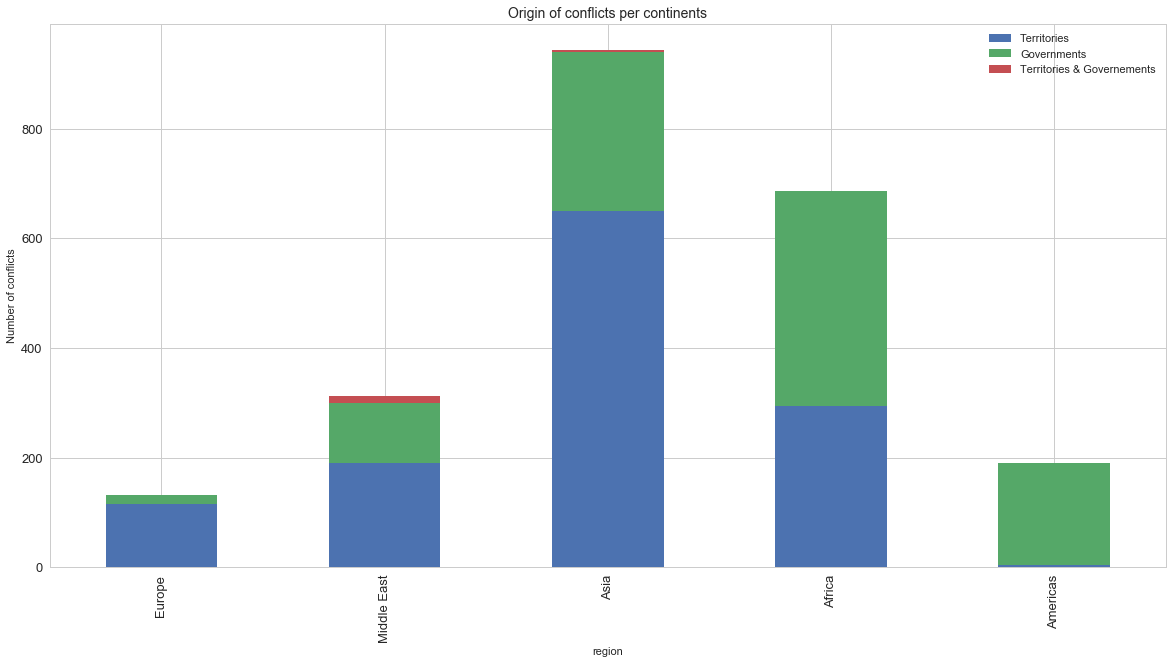

In [70]:
cleaned_df = ucdp_df.loc[~ucdp_df['region'].isin(['1, 3', '1, 2', '1, 4', '1, 5', '1, 3, 5', '1, 2, 3, 5'])]
myticks = ['Europe','Middle East','Asia','Africa','Americas']
df2 = cleaned_df.groupby(['region', 'incomp'])['region'].count().unstack('incomp').fillna(0)

plt.figure(figsize=(20,10), dpi=60, facecolor='w', edgecolor='k')
df2[[1,2,3]].plot(kind='bar', stacked=True, figsize = (20,10), fontsize = 13)
plt.xticks(np.linspace(1,5,5)-1, myticks)
plt.legend(['Territories', 'Governments', 'Territories & Governements'],fontsize = 11)
plt.title('Origin of conflicts per continents', fontsize = 14)
plt.ylabel('Number of conflicts')
plt.show()

Different continents seem to bring different problematics to the conflicts in game. For example in Europe and Asia, most of the conflicts are concerning territories claims. Whereas in Africa and Americas, conflicts between governing issues appears to be the main motor of the conflicts. One can observe that Middle East is the only region where we observe truly both of those cases in the same conflicts.

### Evolution of conflicts

To better understands the history of conflicts throughout the world, we plot the number of conflicts over time from 1946 to 2016 on all continents. 

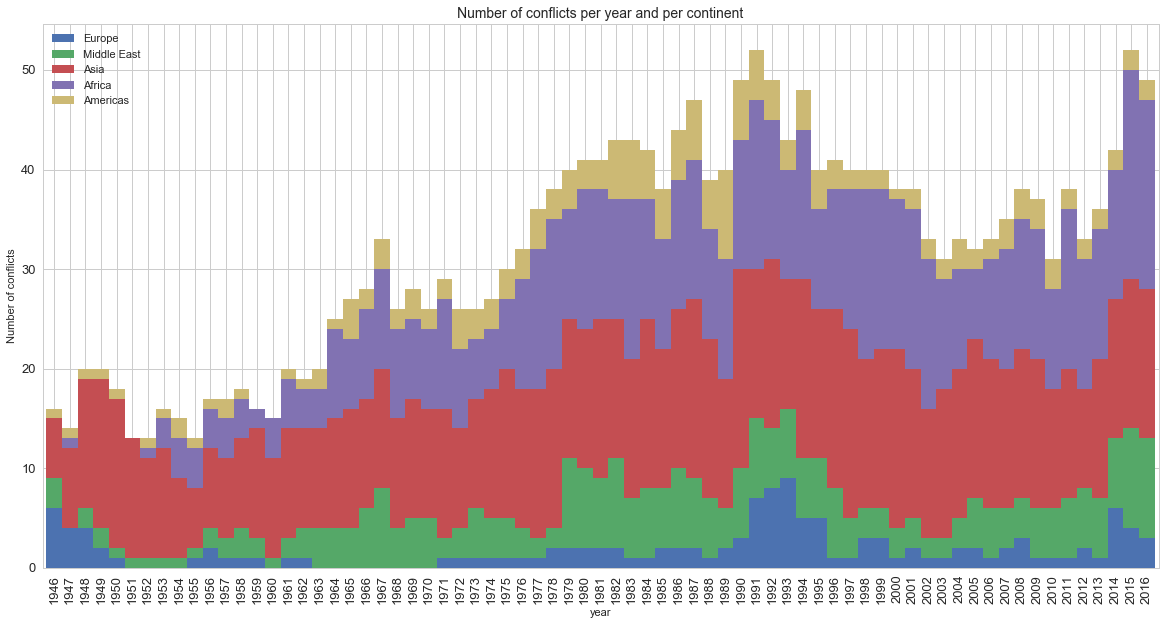

In [71]:
cleaned_df = ucdp_df.loc[~ucdp_df['region'].isin(['1, 3', '1, 2', '1, 4', '1, 5', '1, 3, 5', '1, 2, 3, 5'])]

myticks = ['Europe','Middle East','Asia','Africa','Americas']
df2 = cleaned_df.groupby(['year', 'region'])['year'].count().unstack('region').fillna(0)

plt.figure(figsize=(20,10), dpi=60, facecolor='w', edgecolor='k')
df2.plot(kind='bar', stacked=True, figsize = (20,10), fontsize = 13, width = 1)
#plt.xticks(np.linspace(1,5,5)-1, myticks)
plt.legend(['Europe','Middle East','Asia','Africa','Americas'],fontsize = 11)
plt.title('Number of conflicts per year and per continent', fontsize = 14)
plt.ylabel('Number of conflicts')
plt.show()

By beginning our observations by the 'old-continent', Europe, we observe that the number of conflicts is declining after the end of the IInd World War, to stagnate to almost no-conflicts for a long period. The Yugoslav war that begun in 1991 stop this period of peace that we continue to live with the conflicts in Eastern Europe with Russia.

The most important observation is that the conflicts seemed almost non-existant in Africa after the World War and began to took importance on the continent starting in 1952. This date also corresponds to the independance of Lybia, the first country to achieve independence through the United Nations and one of the first former European possessions in Africa to gain independence. 

### Closer look at colonized continents

With the graph above, we observe some simple tendancies that needs to be refined for each colonized continents. One can observe below the evolution of conflicts for each continents. Africa saw its conflict grow after the seconf world war to remain instable up to this day. In comparison, Asia presents an almost constant number of conflicts over time.
Middle East in another hand is alterning between low conflicts period and higher ones. We observe a rise in the conflicts in the 1970s during the wars with Israel.

In [171]:
def evolution_conflict(df, string_):
    plt.figure(figsize=(20,5), dpi=60, facecolor='w', edgecolor='k')
    y = df['year'].value_counts()
    y = y.sort_index()
    sns.barplot(y.index, y.values,palette="Reds_d")
    plt.xlabel('Year')
    plt.ylabel('Number of conflicts')
    plt.title('Evolution of conflicts in %s' %(string_))
    plt.show()

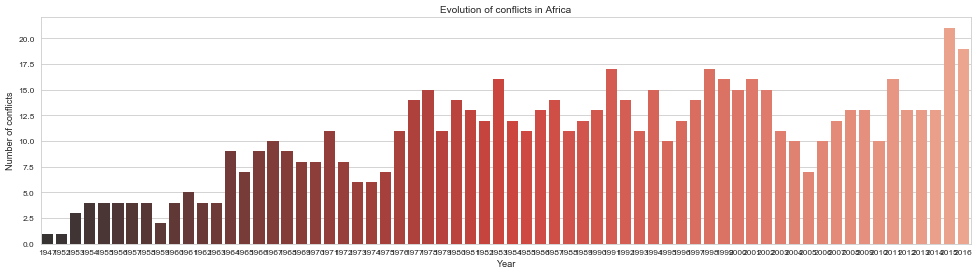

In [172]:
africa_df = cleaned_df[cleaned_df['region'] == '4']
evolution_conflict(africa_df, 'Africa')

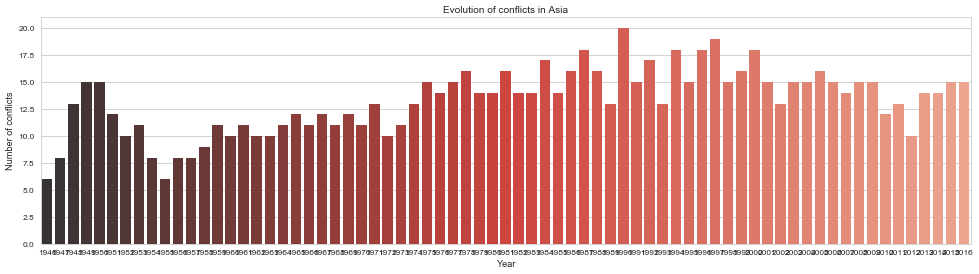

In [173]:
asia_df = cleaned_df[cleaned_df['region'] == '3']
evolution_conflict(asia_df, 'Asia')

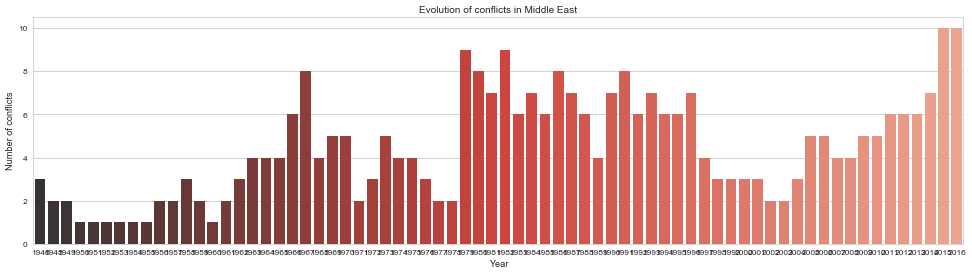

In [174]:
middle_df = cleaned_df[cleaned_df['region'] == '2']
evolution_conflict(middle_df, 'Middle East')

## Relevant countries examples

Our project will focus on a world map of the decolonization and the conflicts that emerged in countries after that. In order to observe if this is possible, we will perform a short analysis on chosen countries. We will study two main cases, countries where the decolonization was violent (like Algeria, Congo...) and the ones where it was mostly peacefull (like Syria, India ...).

In [161]:
def country_analysis(country_string):
    # Plot number of conflicts over time / Add history related remarks? (Like a line at the independence)
    current_df = cleaned_df[cleaned_df['location'] == country_string]
    
    plt.figure(figsize=(20,5), dpi=60, facecolor='w', edgecolor='k')
    y = current_df['year'].value_counts()
    y = y.sort_index()
    plt.bar(y.index, y.values)
    plt.xlabel('Year')
    plt.ylabel('Number of conflicts')
    plt.title('Evolution of conflicts in %s' %(country_string))
    plt.show()
       
    # Plot independance date on the graph
    
    # Add comments on the most present beligerents
    
    

### Violently decolonized country - Algeria, Congo, Vietnam?

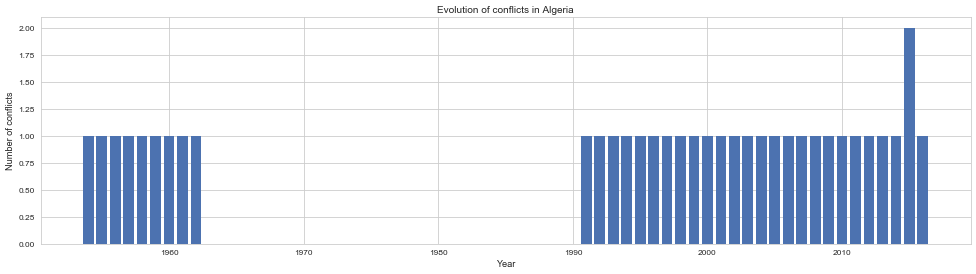

In [167]:
country_string = 'Algeria'
#decolonisation_df[decolonisation_df['Colonized Country'] == country_string]
current_df = cleaned_df[cleaned_df['location'] == country_string]
country_analysis(country_string)

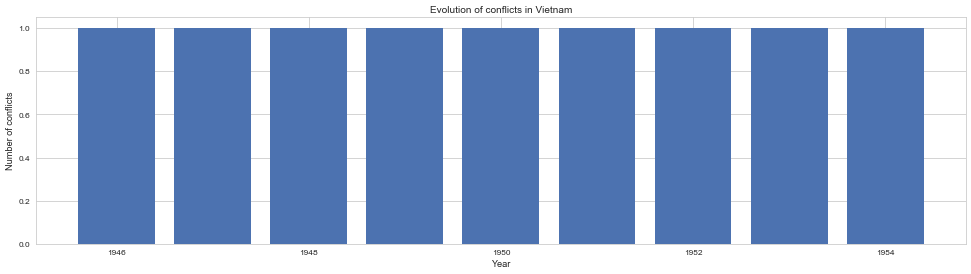

In [170]:
country_string = 'Vietnam'
#decolonisation_df[decolonisation_df['Colonized Country'] == country_string]
current_df = cleaned_df[cleaned_df['location'] == country_string]
country_analysis(country_string)

### Peacefully decolonized country - India, Lebanon, Philippines?

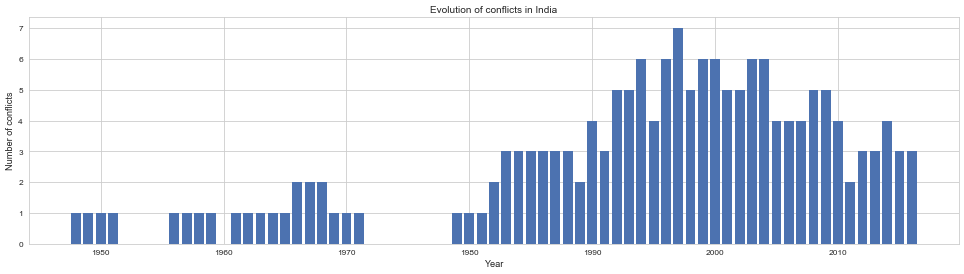

In [165]:
country_string = 'India'
country_analysis(country_string)

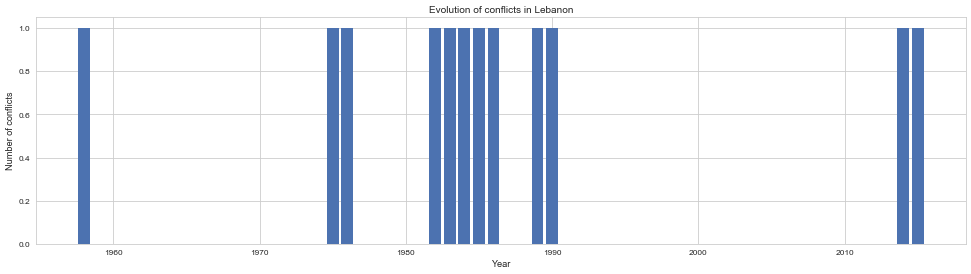

In [168]:
country_string = 'Lebanon'
country_analysis(country_string)

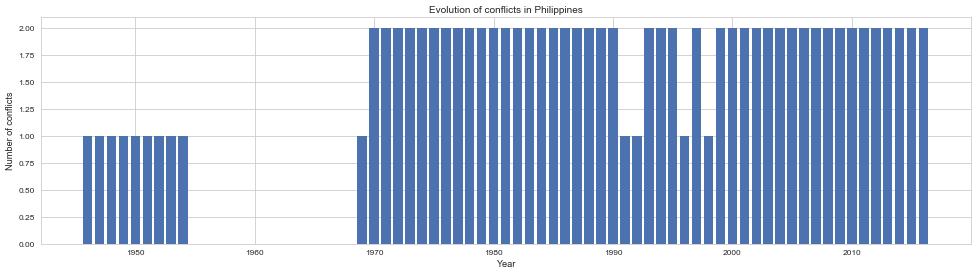

In [169]:
country_string = 'Philippines'
country_analysis(country_string)